# Voronoi Tessellations 

Date: 19th July 2019

I was thinking of ways of enumerating the binding sites on the oxide surfaces. We cannot use conventional networkx approach that has implemented before (Why?) so had to think of something else. 

## Introduction

Adopoted from: http://datagenetics.com/blog/may12017/index.html

Named after Ukranian mathematician, Georgy Voronoi. 
Tessellate (verb) -- cover a floor with mosaic 

This is part of proximity diagram analysis sub-field 

So basically the colored region of the voronoi plots are the tessellations part 

Think of crystals growing from the main site untill they intersect. That idea could used to generate the voronoi diagram. 

These diagrams basically tells us the region where the node (that lies at the center of the polygon) is nearest compared to all other nodes in considerations. 

### Applications: 

1. To find nearest airport, at any point in space. 
2. Finding 'safest path' for autonomous vehicles
3. Secure path to the vault/trasure without being noticed by the guards, cameras -- they would have a set field of view which could be taken a circle. 
4. A more interesting additional application of this algorthim would be to visualize the k-NearestNeighbor algorthim atleast where k=1! 

A noteworthy application appeared in John Snow's analysis of the London cholera outbreak of 1854. The map bellow, included in Snow's Report on the Cholera Outbreak in the Parish of St. James, Westminster 1854, shows the distribution of deaths due to cholera. Each bar represents a death. This was before the germ theory for spread of diseases was developed. Noxious 'miasma' emanating from the rotting organic matter was suspected as the one of the potential sources of the outbreak. 

Snow then considered the sources of drinking water, pumps distributed throughout the city, and drew a line labeled "Boundary of equal distance between Broad Street Pump and other Pumps" which indicated the Broad Street Pump's Voronoi cell.

This analysis supported Snow's hypothesis that the cholera deaths were associated with contaminated water, in this case, from the Broad Street Pump. Snow recommended that the pump handle be removed, after which action the cholera outbreak quickly ended. Snow's work helped develop the modern field of epidemiology, and this map has been called "The most famous 19th century disease map".


Voronoi maps have uses in Archeology and Anthropology to identify regions under the influence of different clans, and in Biology to compare plant and animal competitions. In Geography and Marketing they can be used to map regions based on sparse samples.


## Delaunay Triangulation

Once we make the voronoi diagram, if we connect the nodes to each other such that each two nodes are sharing an edge. What we create is a Delaunay triangulation.

Named after Russian mathematician, Boris Delaunay. Delaunay is also credited as being the organizer of the first mathematical olympiad for high school students in the Soviet Union

It's a 'dual graph' of a voronoi diagram. Delaunay triangulations are leveraged heavily in many applications, especially computer graphics, as they are ways to break up regions into triangles. 3D graphics cards are optimized to render triangles very efficiently. Three points make up a triangle, and there is only one way this can happen. As soon as a polygon has more than three vertices, however, if you have to break this shape into a plurality of triangles, there are multiples ways this can happen.
More info on the use of traingles in computer graphics: https://www.youtube.com/watch?v=KdyvizaygyY

Delaunay triangulations maximize the minimum angle of all the angles of the triangles in the triangulation!


### Constructing a voronoi diagram

Let's try and construct our own voronoi diagram. SciPy already implements such a routine. Let's use that first. 


In [7]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
from matplotlib import cm
%matplotlib inline

data_points = np.random.randint(100,size=(3,2))
print(data_points)

dummy_x = np.linspace(0,100,10)
dummy_y = np.linspace(0,100,10)

def get_least_distance(point,data_set):
        dist = []
        for i,j in enumerate(data_set):
            dist.append(np.linalg.norm(point-j))
        return(data_set[np.argmin(dist)],np.argmin(dist))

viridis = cm.get_cmap('viridis', len(data_points))
color = viridis(range(len(data_points)))
len(color)
plot_points = []
'''
for x in dummy_x:
    for y in dummy_y:
        dummy=np.array(x,y)
        cloest_point, clost_point_index = get_least_distance(dummy,data_points)
        plot_points.append([dummy, color[clost_point_index]])
'''

[[73 26]
 [ 2 92]
 [48  4]]


'\nfor x in dummy_x:\n    for y in dummy_y:\n        dummy=np.array(x,y)\n        cloest_point, clost_point_index = get_least_distance(dummy,data_points)\n        plot_points.append([dummy, color[clost_point_index]])\n'

[[33  8]
 [33 51]
 [11 79]
 [15 84]
 [12 27]
 [89 86]
 [44 56]
 [27 69]
 [ 2 44]
 [26 86]]


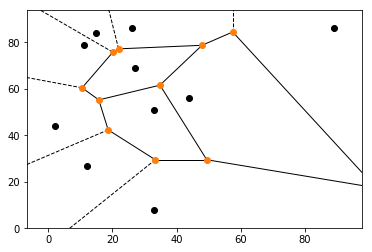

In [8]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
%matplotlib inline

data_points = np.random.randint(100,size=(10,2))
print(data_points)
vor = Voronoi(data_points)
fig = voronoi_plot_2d(vor)
plt.plot(data_points[:,0], data_points[:,1], 'ko')
plt.show()
#Routine to reconstruct voronoi regions in 2D diagram to finite regions. 
'''
If we wish to color the region inside the voronoi region the regions at the boundary are difficult to fill in directly
as they are set to -1 from the voronoi code. 
'''
points = np.append(data_points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

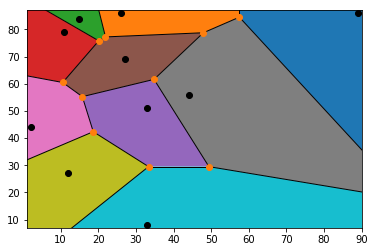

In [9]:
# compute Voronoi tesselation
vor = Voronoi(points)
# plot
voronoi_plot_2d(vor)
# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))
# fix the range of axes
plt.plot(data_points[:,0], data_points[:,1], 'ko')
plt.xlim(np.min(data_points[:,0])-1.0, np.max(data_points[:,0])+1.0)
plt.ylim(np.min(data_points[:,1])-1.0, np.max(data_points[:,1])+1.0)
plt.show()

Next we will use this to see the nearest thai restaurant to my residence 
https://medium.com/future-vision/google-maps-in-python-part-2-393f96196eaf
http://zderadicka.eu/voronoi-diagrams/